In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('FyntraCustomerData.csv')
data

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


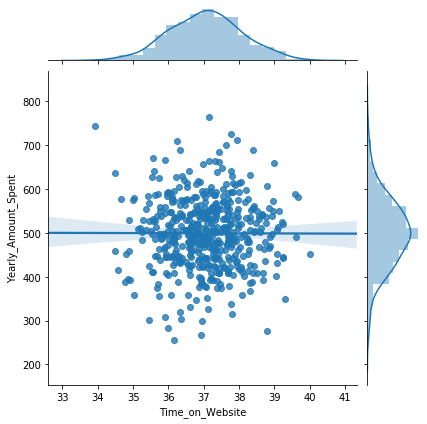

In [4]:
sns.jointplot("Time_on_Website","Yearly_Amount_Spent",data=data,kind="reg")

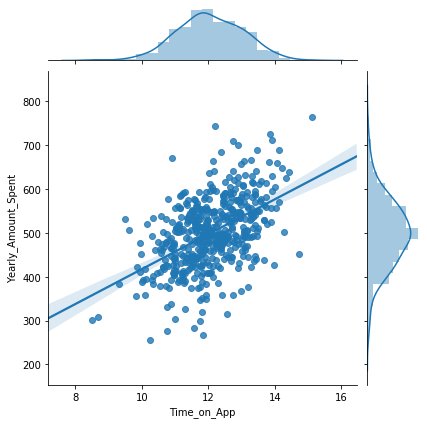

In [5]:
sns.jointplot("Time_on_App","Yearly_Amount_Spent",data=data,kind="reg")

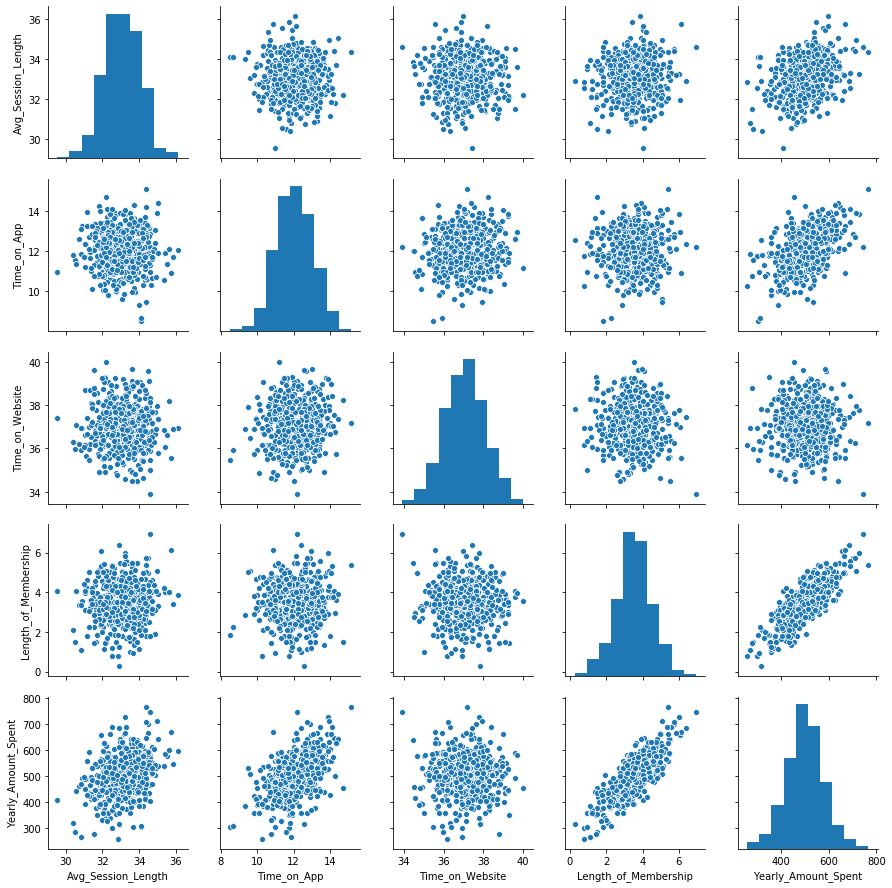

In [6]:
sns.pairplot(data)

In [ ]:
# from the pairplot we can find that length of membership is the most correlated feature with yearly amount spent

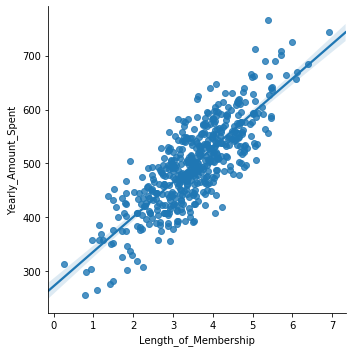

In [8]:
sns.lmplot('Length_of_Membership','Yearly_Amount_Spent',data=data)

In [9]:
y = data['Yearly_Amount_Spent']
x = data[['Avg_Session_Length','Time_on_App','Time_on_Website','Length_of_Membership']]

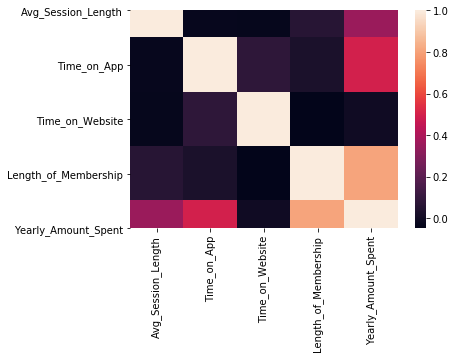

In [10]:
sns.heatmap(data.corr())

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=85)
# random_state indicates that same random numbers will be generated for that number and can be used as a standard throughout the analysis

In [14]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
predictions = lm.predict(x_test)

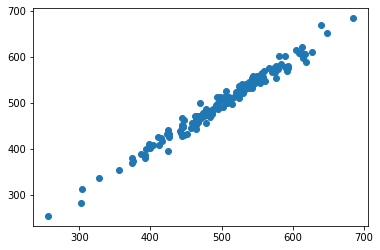

In [17]:
plt.scatter(y_test,predictions)

In [18]:
from sklearn import metrics
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

RMSE 10.572658672879317


In [20]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
Avg_Session_Length,26.081632
Time_on_App,39.187788
Time_on_Website,0.404600
Length_of_Membership,61.417778


In [ ]:
# Company should focus more on their app